##Part 1

####Importing Dependencies

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
%matplotlib inline

####Reading the data

In [ ]:
from google.colab import files
#to upload while running
uploaded = files.upload()
df = pd.read_csv("/content/CS746_Class_Form.csv")
df

Saving CS746_Class_Form.csv to CS746_Class_Form (1).csv


,Country of Origin,University major,Gender,Age,Height (inches),Weight (lbs),BMI,Number of siblings,Marital status,GPA,...,Preferred platform to watch movies,Number of countries visited,Preference of beach/mountains,Favorite color,Preference of Coffee/Tea,Preference of iPhone/Android,Type of music,Preference of hot/cold weather,Preference of Cats/dogs,Number of shopping trips a month
0,India,Computer science,Female,22,68.4,130.00,NaN,1.0,Single,4.00,...,Youtube,2,Beach,Pink,Neither,Android,Melody,Cold,Cats,2.0
1,India,Computer science,Female,28,64.0,143.30,NaN,2.0,Married,4.00,...,Hulu,2,Beach,Sky Blue,Tea,iPhone,Melody,Hot,Neither,3.0
2,India,Data Science,Male,22,72.0,185.18,NaN,1.0,Single,3.39,...,Other,1,Mountains,Red,Neither,Android,Indian folk music,Hot,Dogs,0.0
3,India,Computer science,Male,24,67.0,125.00,NaN,1.0,Single,3.58,...,Youtube,2,Beach,Black,Neither,Android,NaN,NaN,Dogs,NaN
4,India,Data Science,Male,23,66.0,167.00,NaN,1.0,Single,3.20,...,Netflix,1,Beach,Green,Tea,Android,Trance,Cold,Neither,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,India,Data Science,Male,22,72.0,185.19,NaN,1.0,Single,3.39,...,Own computer,1,Mountains,Red,Neither,Android,Indian music,Hot,Dogs,1.0
112,India,Management Science,Male,22,68.0,120.00,NaN,0.0,Single,NaN,...,Netflix,1,Beach,Blue,Coffee,iPhone,Melody,Hot,Neither,1.0
113,India,Computer science,Female,23,63.0,145.00,NaN,0.0,Single,4.00,...,Youtube,2,Mountains,Red,Tea,iPhone,Hip hop,Cold,Dogs,2.0
114,India,Business Analytics_Computer science,Male,24,69.0,174.00,NaN,1.0,Single,3.30,...,Other,2,Mountains,Red,Neither,iPhone,Melody,Cold,Dogs,0.0


###Descriptive analysis

In [ ]:
#checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 38 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country of Origin                                                   116 non-null    object 
 1   University major                                                    116 non-null    object 
 2   Gender                                                              116 non-null    object 
 3   Age                                                                 116 non-null    int64  
 4   Height (inches)                                                     111 non-null    float64
 5   Weight (lbs)                                                        105 non-null    float64
 6   BMI                                                                 0 non-null      float64
 7   Number of sibling

In [ ]:
#descriptive statistics
df.describe()

,Age,Height (inches),Weight (lbs),BMI,Number of siblings,GPA,Programming experience (in months),Number of semesters (college and masters combined),Number of courses taking this semester,Number of hours of study per week,...,Average hours spent on phone each day,Number of active social platforms (LinkedIn included),Number of friends/followers on social platform (LinkedIn included),Number of high school classmates still kept in touch,Number of close friends,Number of books read a month (non school related),Stipend received per month,Number of days of exercise per week,Number of movies watched per week,Number of shopping trips a month
count,116.000000,111.000000,105.000000,0.0,112.000000,111.000000,116.000000,109.000000,114.000000,109.000000,...,109.000000,109.000000,104.000000,105.000000,109.000000,103.000000,104.000000,108.000000,111.000000,109.000000
mean,23.448276,67.598468,152.070476,NaN,1.071429,3.247568,18.482759,10.477064,3.087719,14.743119,...,4.243119,3.183486,687.182692,20.980952,5.990826,0.815534,235.769231,3.722222,2.486486,2.376147
std,2.069845,4.622898,28.620556,NaN,0.667310,0.329921,22.383023,1.818609,0.603257,8.040872,...,2.558224,1.421822,2091.191716,78.190962,4.732659,1.054845,408.791001,3.231947,2.083986,1.985079
min,21.000000,57.000000,99.000000,NaN,0.000000,2.300000,0.000000,4.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,65.000000,134.480000,NaN,1.000000,3.000000,4.000000,9.000000,3.000000,10.000000,...,2.000000,2.000000,200.000000,5.000000,3.000000,0.000000,0.000000,1.750000,1.000000,1.000000
50%,23.000000,67.200000,148.000000,NaN,1.000000,3.200000,10.000000,11.000000,3.000000,14.000000,...,4.000000,3.000000,300.000000,10.000000,5.000000,0.000000,0.000000,3.000000,2.000000,2.000000
75%,24.000000,69.800000,167.550000,NaN,1.000000,3.490000,24.500000,12.000000,3.000000,20.000000,...,5.000000,4.000000,561.000000,15.000000,7.000000,1.000000,462.500000,5.000000,3.000000,4.000000
max,34.000000,94.000000,250.000000,NaN,4.000000,4.000000,120.000000,15.000000,7.000000,40.000000,...,15.000000,9.000000,21000.000000,800.000000,30.000000,5.000000,1500.000000,20.000000,12.000000,10.000000


In [ ]:
#Getting the clear idea of null values in each column
df.isnull().sum()

Country of Origin                                                       0
University major                                                        0
Gender                                                                  0
Age                                                                     0
Height (inches)                                                         5
Weight (lbs)                                                           11
BMI                                                                   116
Number of siblings                                                      4
Marital status                                                          0
GPA                                                                     5
Programming experience (in months)                                      0
Preferred programming language                                          0
Number of semesters (college and masters combined)                      7
Number of courses taking this semester

In [ ]:
#dropping the BMI column as it is empty and it is derived from the height & weight. So, won't effect the analysis
df1 = df.drop(columns=['BMI'])

In [ ]:
# listing Numerical data type Columns
num_features = df1.columns[(df1.dtypes !='object').values].tolist()
num_features

['Age',
 'Height (inches)',
 'Weight (lbs)',
 'Number of siblings',
 'GPA ',
 'Programming experience (in months)',
 'Number of semesters (college and masters combined)',
 'Number of courses taking this semester',
 'Number of hours of study per week',
 'Average hours of sleep per night',
 'Average hours spent on phone each day',
 'Number of active social platforms (LinkedIn included)',
 'Number of friends/followers on social platform (LinkedIn included)',
 'Number of high school classmates still kept in touch',
 'Number of close friends',
 'Number of books read a month (non school related)',
 'Stipend received per month',
 'Number of days of exercise per week',
 'Number of movies watched per week',
 'Number of shopping trips a month']

In [ ]:
# listing categorical(Non-Numerical) Columns
cat_features = df.columns[(df.dtypes =='object').values].tolist()
cat_features

['Country of Origin',
 'University major',
 'Gender',
 'Marital status',
 'Preferred programming language',
 'Place of stay',
 'Working status',
 'Vehicle own status',
 'Preferred platform to watch movies',
 'Number of countries visited',
 'Preference of beach/mountains',
 'Favorite color',
 'Preference of Coffee/Tea',
 'Preference of iPhone/Android',
 'Type of music',
 'Preference of  hot/cold weather',
 'Preference of Cats/dogs']

###Missing Value Analysis

In [ ]:
# using Simple Imputer to replace the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Replacing the nan values with mode
imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(df1)
df2 = pd.DataFrame(imputer.transform(df1.loc[:,:]), 
                  columns = df1.columns)
df2

,Country of Origin,University major,Gender,Age,Height (inches),Weight (lbs),Number of siblings,Marital status,GPA,Programming experience (in months),...,Preferred platform to watch movies,Number of countries visited,Preference of beach/mountains,Favorite color,Preference of Coffee/Tea,Preference of iPhone/Android,Type of music,Preference of hot/cold weather,Preference of Cats/dogs,Number of shopping trips a month
0,India,Computer science,Female,22,68.4,130.0,1.0,Single,4.0,0,...,Youtube,2,Beach,Pink,Neither,Android,Melody,Cold,Cats,2.0
1,India,Computer science,Female,28,64.0,143.3,2.0,Married,4.0,50,...,Hulu,2,Beach,Sky Blue,Tea,iPhone,Melody,Hot,Neither,3.0
2,India,Data Science,Male,22,72.0,185.18,1.0,Single,3.39,24,...,Other,1,Mountains,Red,Neither,Android,Indian folk music,Hot,Dogs,0.0
3,India,Computer science,Male,24,67.0,125.0,1.0,Single,3.58,24,...,Youtube,2,Beach,Black,Neither,Android,Melody,Cold,Dogs,2.0
4,India,Data Science,Male,23,66.0,167.0,1.0,Single,3.2,3,...,Netflix,1,Beach,Green,Tea,Android,Trance,Cold,Neither,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,India,Data Science,Male,22,72.0,185.19,1.0,Single,3.39,24,...,Own computer,1,Mountains,Red,Neither,Android,Indian music,Hot,Dogs,1.0
112,India,Management Science,Male,22,68.0,120.0,0.0,Single,3.0,5,...,Netflix,1,Beach,Blue,Coffee,iPhone,Melody,Hot,Neither,1.0
113,India,Computer science,Female,23,63.0,145.0,0.0,Single,4.0,12,...,Youtube,2,Mountains,Red,Tea,iPhone,Hip hop,Cold,Dogs,2.0
114,India,Business Analytics_Computer science,Male,24,69.0,174.0,1.0,Single,3.3,0,...,Other,2,Mountains,Red,Neither,iPhone,Melody,Cold,Dogs,0.0


In [ ]:
#checking again if there any null values left
missing_data = pd.DataFrame(df2.isnull().sum()) #sum of all null values count into a dataframe
np.transpose(missing_data) #converting into transpose of the dataframe for better view

,Country of Origin,University major,Gender,Age,Height (inches),Weight (lbs),Number of siblings,Marital status,GPA,Programming experience (in months),...,Preferred platform to watch movies,Number of countries visited,Preference of beach/mountains,Favorite color,Preference of Coffee/Tea,Preference of iPhone/Android,Type of music,Preference of hot/cold weather,Preference of Cats/dogs,Number of shopping trips a month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking unique values from Categorical Columns

for i in df1.columns[(df1.dtypes =='object').values].tolist():
    print(i,'\n')
    print(df1[i].value_counts())
    print('-----------------------------------------------')

Country of Origin 

India       99
India        8
USA          3
Pakistan     2
Nepal        1
Mexico       1
Japan        1
Malaysia     1
Name: Country of Origin, dtype: int64
-----------------------------------------------
University major 

Computer science                                                  54
Data Science                                                      24
Data Science                                                      13
Computing                                                          4
Others                                                             3
Masters                                                            3
Business Analytics_Computer science                                3
Management Science                                                 3
Mathematical Foundation of Data Analytics and Computer science     2
Electronic and computer engineering                                2
Business analytics_Computer science                              

In [ ]:
#converting numerical data type as float64
df2[num_features]=df2[num_features].astype(np.float64)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 37 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country of Origin                                                   116 non-null    object 
 1   University major                                                    116 non-null    object 
 2   Gender                                                              116 non-null    object 
 3   Age                                                                 116 non-null    float64
 4   Height (inches)                                                     116 non-null    float64
 5   Weight (lbs)                                                        116 non-null    float64
 6   Number of siblings                                                  116 non-null    float64
 7   Marital status   

####Outlier analysis

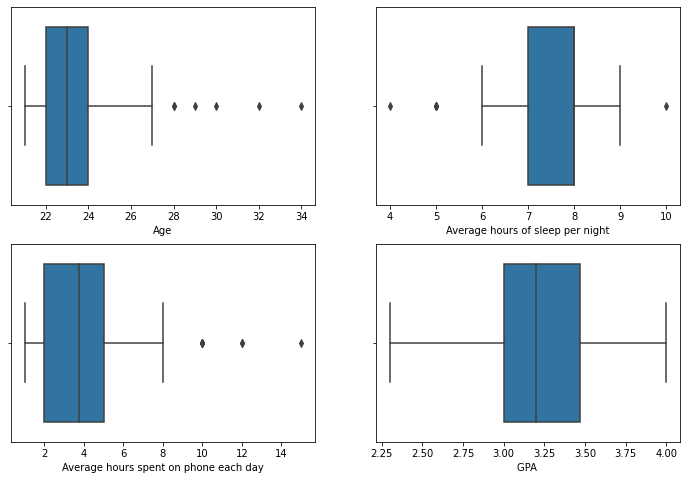

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (12,8))


sns.boxplot(x=df2['Age'], ax=ax[0][0])
sns.boxplot(x=df2['Average hours of sleep per night'], ax=ax[0][1])
sns.boxplot(x=df2['Average hours spent on phone each day'], data=df2, ax=ax[1][0])
sns.boxplot(x=df2['GPA '], data=df2, ax=ax[1][1])


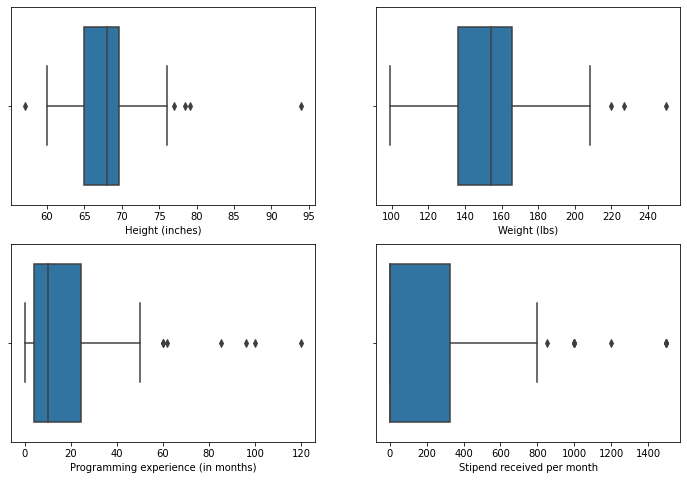

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (12,8))


sns.boxplot(x=df2['Height (inches)'], ax=ax[0][0])
sns.boxplot(x=df2['Weight (lbs)'], ax=ax[0][1])
sns.boxplot(x=df2['Programming experience (in months)'], data=df2, ax=ax[1][0])
sns.boxplot(x=df2['Stipend received per month'], data=df2, ax=ax[1][1])

###Exploratory data analysis

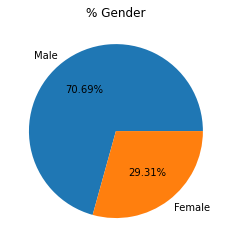

In [ ]:

plt.pie(df2['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('% Gender')
plt.show()

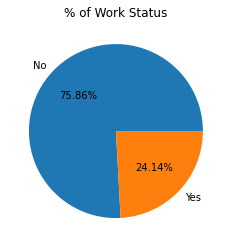

In [ ]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(df2['Working status'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('% of Work Status')
plt.show()

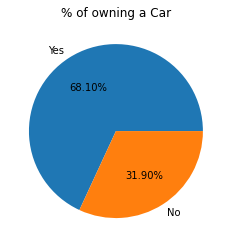

In [ ]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(df2['Vehicle own status'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of owning a Car')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


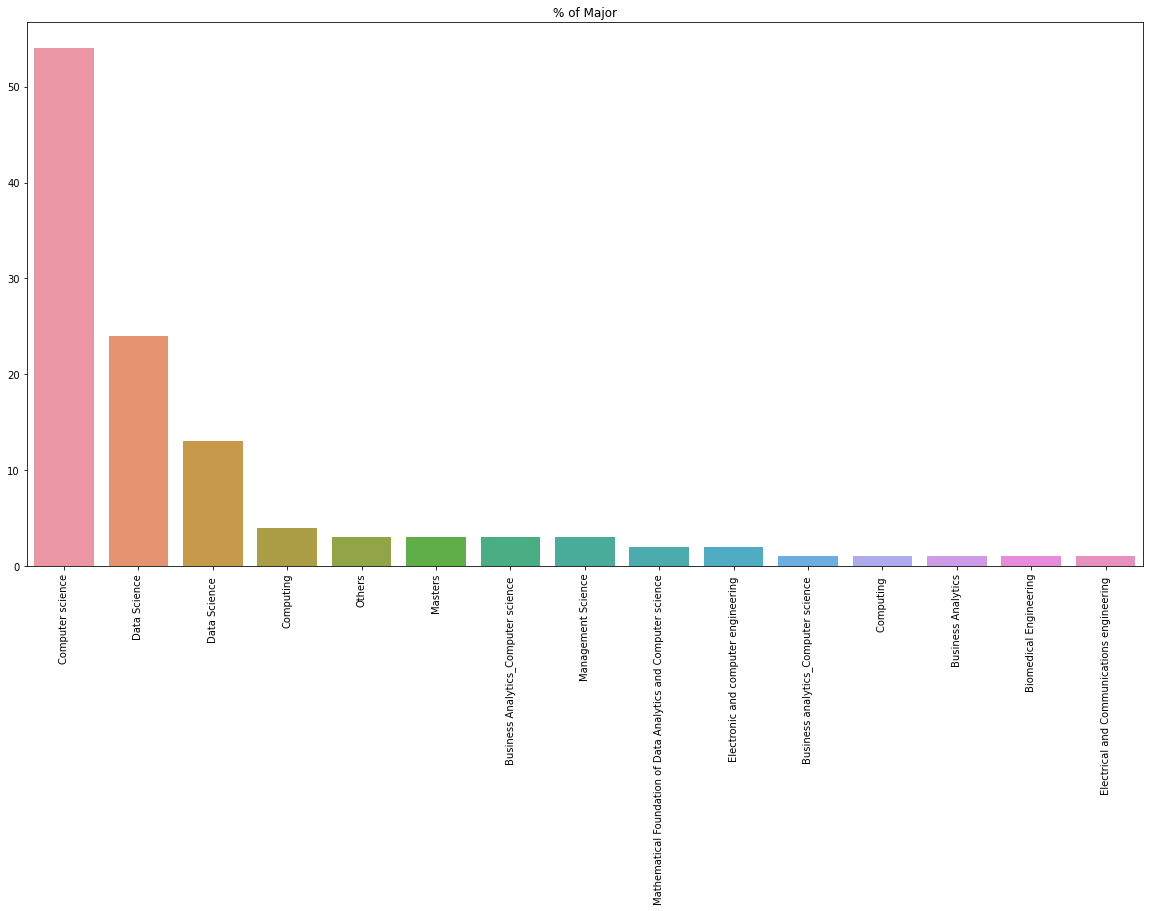

In [ ]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(20,10))
sns.barplot(df2['University major'].value_counts().index, df2['University major'].value_counts().values)
plt.xticks(rotation= 90)
plt.title('% of Major')
plt.show()

###Correlation plot

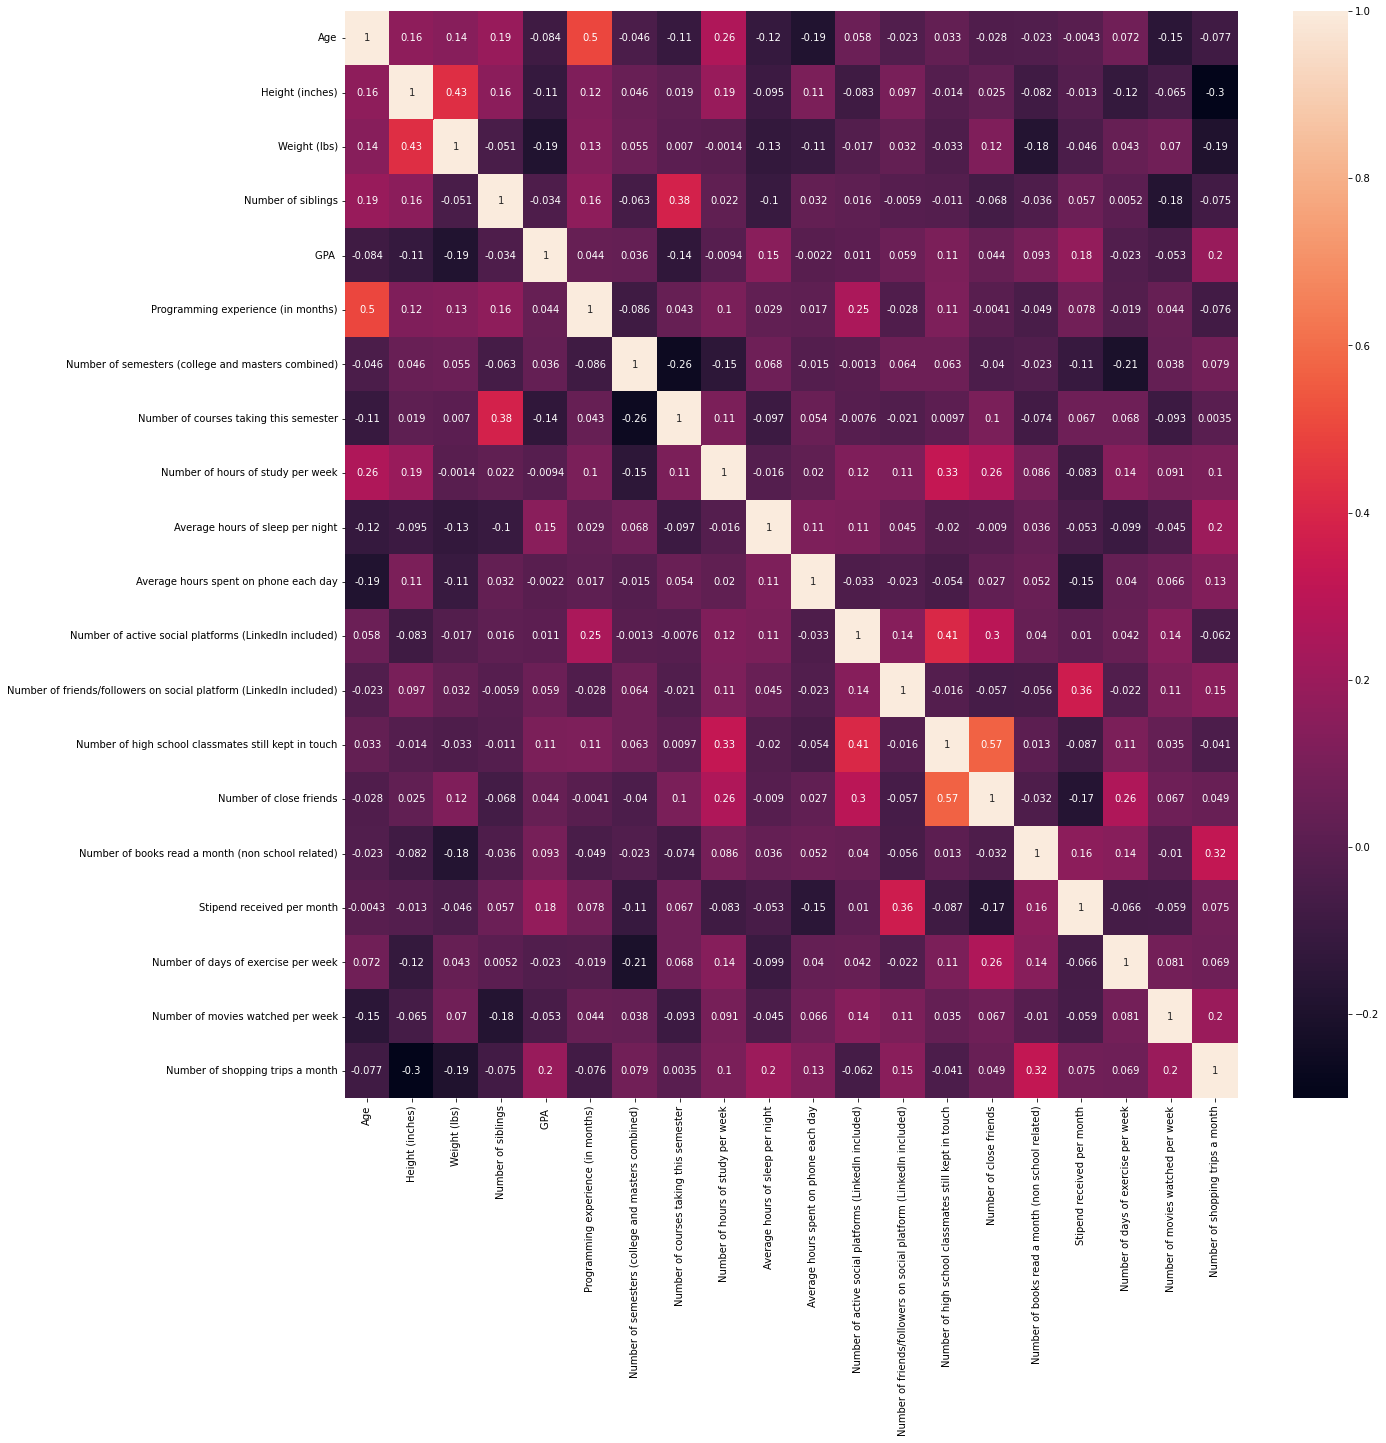

In [ ]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (20,20))
sns.heatmap(df2.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


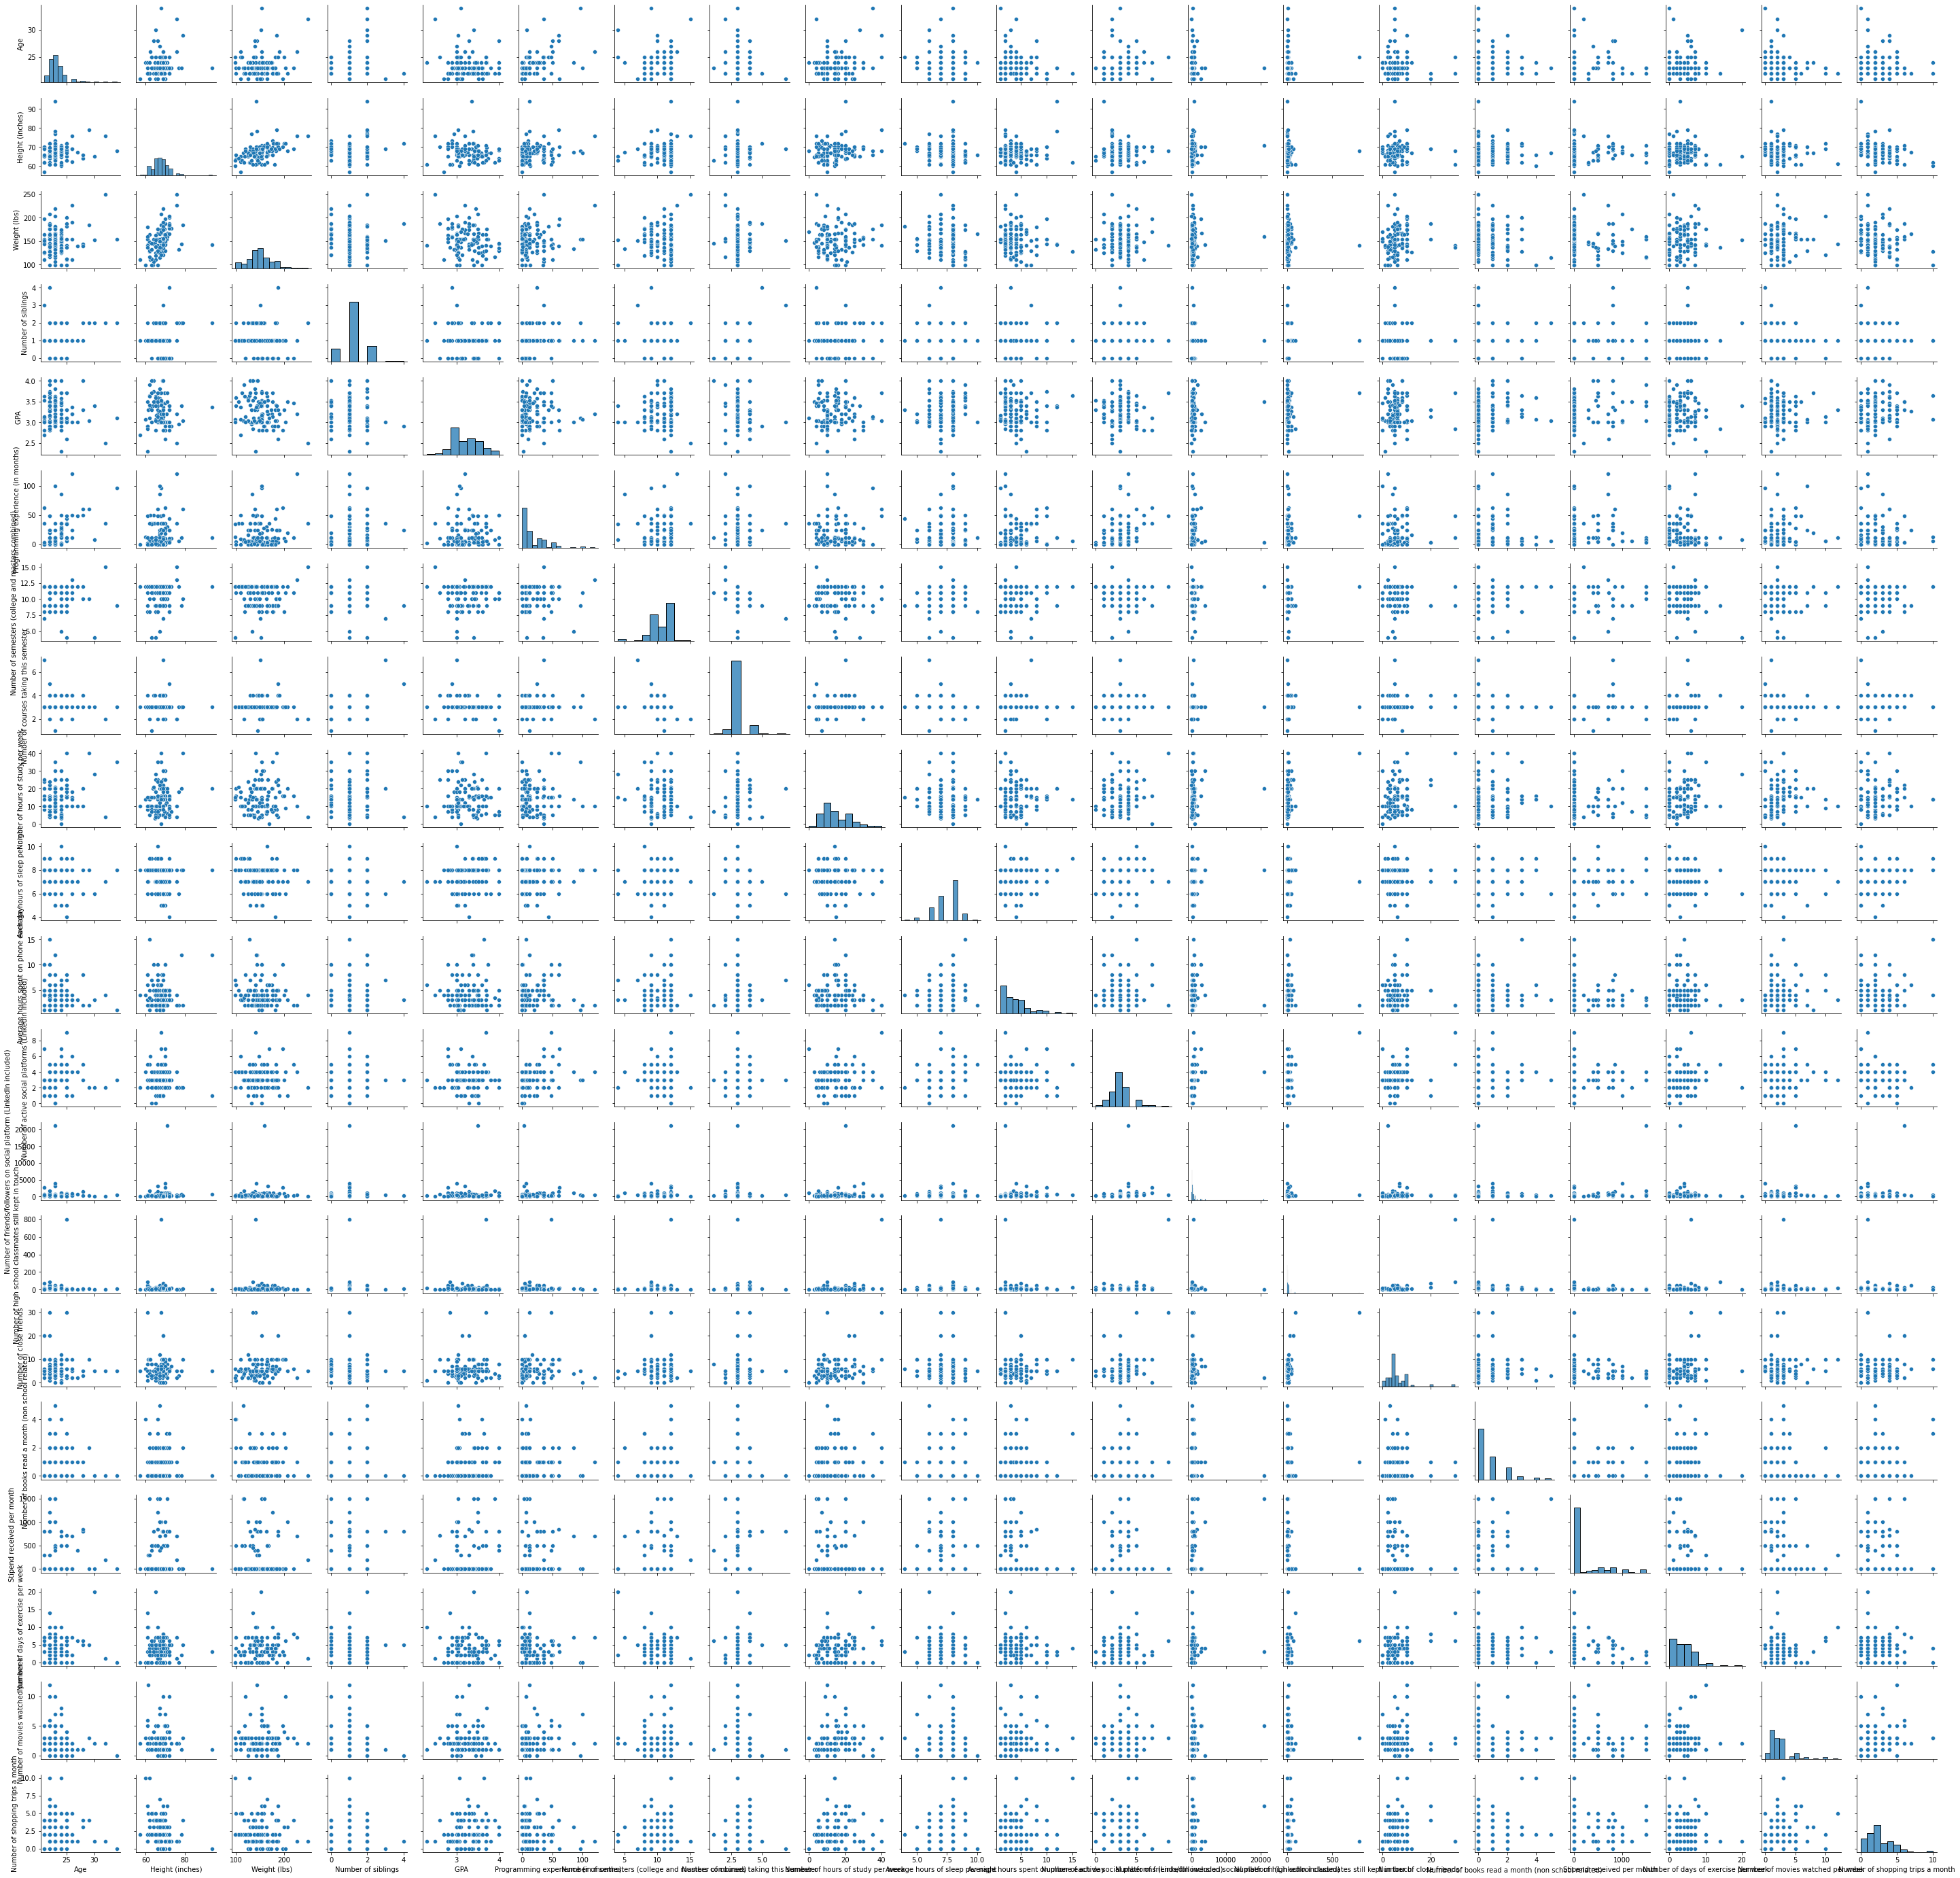

In [ ]:
#using pairplot to find pairwise relationships in a dataset
sns.pairplot(df2[num_features],kind='scatter')
plt.show()

In [ ]:
#using .corr to find the correlation values 
df2.corr()

,Age,Height (inches),Weight (lbs),Number of siblings,GPA,Programming experience (in months),Number of semesters (college and masters combined),Number of courses taking this semester,Number of hours of study per week,Average hours of sleep per night,Average hours spent on phone each day,Number of active social platforms (LinkedIn included),Number of friends/followers on social platform (LinkedIn included),Number of high school classmates still kept in touch,Number of close friends,Number of books read a month (non school related),Stipend received per month,Number of days of exercise per week,Number of movies watched per week,Number of shopping trips a month
Age,1.000000,0.164433,0.143517,0.194854,-0.083851,0.499804,-0.045723,-0.108753,0.258882,-0.115126,-0.185671,0.058007,-0.023221,0.033198,-0.027822,-0.023145,-0.004288,0.071938,-0.150799,-0.077179
Height (inches),0.164433,1.000000,0.430734,0.156483,-0.114573,0.120876,0.045984,0.018650,0.194190,-0.095070,0.108063,-0.082855,0.097084,-0.013861,0.025157,-0.081689,-0.013148,-0.121779,-0.064976,-0.300555
Weight (lbs),0.143517,0.430734,1.000000,-0.050966,-0.187852,0.129704,0.055266,0.006978,-0.001444,-0.126281,-0.105111,-0.016831,0.032159,-0.032537,0.119455,-0.176142,-0.046139,0.043221,0.070470,-0.193379
Number of siblings,0.194854,0.156483,-0.050966,1.000000,-0.033911,0.164785,-0.063015,0.383803,0.022473,-0.104527,0.032089,0.015590,-0.005915,-0.011495,-0.067708,-0.036084,0.056913,0.005193,-0.176199,-0.074558
GPA,-0.083851,-0.114573,-0.187852,-0.033911,1.000000,0.044362,0.036023,-0.136174,-0.009418,0.149684,-0.002217,0.011242,0.058953,0.107712,0.043975,0.093136,0.177278,-0.022982,-0.052691,0.197250
Programming experience (in months),0.499804,0.120876,0.129704,0.164785,0.044362,1.000000,-0.086320,0.042982,0.104662,0.029202,0.016995,0.252598,-0.028001,0.111929,-0.004072,-0.049410,0.077792,-0.018609,0.043616,-0.076010
Number of semesters (college and masters combined),-0.045723,0.045984,0.055266,-0.063015,0.036023,-0.086320,1.000000,-0.256014,-0.146750,0.067664,-0.015453,-0.001329,0.063933,0.062518,-0.040453,-0.022562,-0.111498,-0.208690,0.037801,0.079467
Number of courses taking this semester,-0.108753,0.018650,0.006978,0.383803,-0.136174,0.042982,-0.256014,1.000000,0.107883,-0.097288,0.054007,-0.007637,-0.021243,0.009690,0.103489,-0.074237,0.066728,0.068471,-0.093304,0.003514
Number of hours of study per week,0.258882,0.194190,-0.001444,0.022473,-0.009418,0.104662,-0.146750,0.107883,1.000000,-0.015640,0.019934,0.119244,0.113939,0.329015,0.261773,0.085656,-0.082591,0.138052,0.090896,0.102794
Average hours of sleep per night,-0.115126,-0.095070,-0.126281,-0.104527,0.149684,0.029202,0.067664,-0.097288,-0.015640,1.000000,0.113880,0.105786,0.044931,-0.020148,-0.009018,0.036370,-0.052917,-0.098513,-0.045188,0.202452


##Feature Scaling

###Normalizing the numerical variables 

In [ ]:
#normalizing using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scale= MinMaxScaler(feature_range=(0,1))

df2[num_features] = minmax_scale.fit_transform(df2[num_features])

In [ ]:
df2

,Country of Origin,University major,Gender,Age,Height (inches),Weight (lbs),Number of siblings,Marital status,GPA,Programming experience (in months),...,Preferred platform to watch movies,Number of countries visited,Preference of beach/mountains,Favorite color,Preference of Coffee/Tea,Preference of iPhone/Android,Type of music,Preference of hot/cold weather,Preference of Cats/dogs,Number of shopping trips a month
0,India,Computer science,Female,0.076923,0.308108,0.205298,0.25,Single,1.000000,0.000000,...,Youtube,2,Beach,Pink,Neither,Android,Melody,Cold,Cats,0.2
1,India,Computer science,Female,0.538462,0.189189,0.293377,0.50,Married,1.000000,0.416667,...,Hulu,2,Beach,Sky Blue,Tea,iPhone,Melody,Hot,Neither,0.3
2,India,Data Science,Male,0.076923,0.405405,0.570728,0.25,Single,0.641176,0.200000,...,Other,1,Mountains,Red,Neither,Android,Indian folk music,Hot,Dogs,0.0
3,India,Computer science,Male,0.230769,0.270270,0.172185,0.25,Single,0.752941,0.200000,...,Youtube,2,Beach,Black,Neither,Android,Melody,Cold,Dogs,0.2
4,India,Data Science,Male,0.153846,0.243243,0.450331,0.25,Single,0.529412,0.025000,...,Netflix,1,Beach,Green,Tea,Android,Trance,Cold,Neither,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,India,Data Science,Male,0.076923,0.405405,0.570795,0.25,Single,0.641176,0.200000,...,Own computer,1,Mountains,Red,Neither,Android,Indian music,Hot,Dogs,0.1
112,India,Management Science,Male,0.076923,0.297297,0.139073,0.00,Single,0.411765,0.041667,...,Netflix,1,Beach,Blue,Coffee,iPhone,Melody,Hot,Neither,0.1
113,India,Computer science,Female,0.153846,0.162162,0.304636,0.00,Single,1.000000,0.100000,...,Youtube,2,Mountains,Red,Tea,iPhone,Hip hop,Cold,Dogs,0.2
114,India,Business Analytics_Computer science,Male,0.230769,0.324324,0.496689,0.25,Single,0.588235,0.000000,...,Other,2,Mountains,Red,Neither,iPhone,Melody,Cold,Dogs,0.0


###converting the categorical features to dummy variables

In [ ]:
#convert dummy function is to convert categorical features for modelling 
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [ ]:
#creating dummies for all categorical variables
for col in cat_features:
    df2 = convert_dummy(df2,col)
df2.head()

,Age,Height (inches),Weight (lbs),Number of siblings,GPA,Programming experience (in months),Number of semesters (college and masters combined),Number of courses taking this semester,Number of hours of study per week,Average hours of sleep per night,...,Type of music_Slow,Type of music_Slow Music,Type of music_Soft Rock,Type of music_Soft rock,Type of music_Telugu pop,Type of music_Trance,Type of music_Western,Preference of hot/cold weather_Hot,Preference of Cats/dogs_Cats,Preference of Cats/dogs_Neither
0,0.076923,0.308108,0.205298,0.25,1.000000,0.000000,0.545455,0.500000,0.500,0.666667,...,0,0,0,0,0,0,0,0,1,0
1,0.538462,0.189189,0.293377,0.50,1.000000,0.416667,0.545455,0.500000,0.500,0.666667,...,0,0,0,0,0,0,0,1,0,1
2,0.076923,0.405405,0.570728,0.25,0.641176,0.200000,0.454545,0.333333,0.200,0.833333,...,0,0,0,0,0,0,0,1,0,0
3,0.230769,0.270270,0.172185,0.25,0.752941,0.200000,0.636364,0.333333,0.125,0.833333,...,0,0,0,0,0,0,0,0,0,0
4,0.153846,0.243243,0.450331,0.25,0.529412,0.025000,0.727273,0.333333,0.625,0.500000,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df2.columns

Index(['Age', 'Height (inches)', 'Weight (lbs)', 'Number of siblings', 'GPA ',
       'Programming experience (in months)',
       'Number of semesters (college and masters combined)',
       'Number of courses taking this semester',
       'Number of hours of study per week', 'Average hours of sleep per night',
       ...
       'Type of music_Slow', 'Type of music_Slow Music',
       'Type of music_Soft Rock', 'Type of music_Soft rock',
       'Type of music_Telugu pop', 'Type of music_Trance',
       'Type of music_Western', 'Preference of  hot/cold weather_Hot',
       'Preference of Cats/dogs_Cats', 'Preference of Cats/dogs_Neither'],
      dtype='object', length=149)

##Filter Methods (Feature Selection)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [ ]:
importances = df2.drop("Average hours of sleep per night", axis=1).apply(lambda x: x.corr(df2['Average hours of sleep per night'])) 
indices = np.argsort(importances)
print(importances[indices])

Preferred programming language_C#     -0.308638
Type of music_Old telugu hits         -0.308638
University major_Data Science         -0.297519
Type of music_Telugu pop              -0.244294
Preference of  hot/cold weather_Hot   -0.223068
                                         ...   
Type of music_Classic                  0.159157
Gender_Female                          0.200012
Number of shopping trips a month       0.202452
University major_Data Science          0.212431
Type of music_Love songs               0.237958
Length: 148, dtype: float64


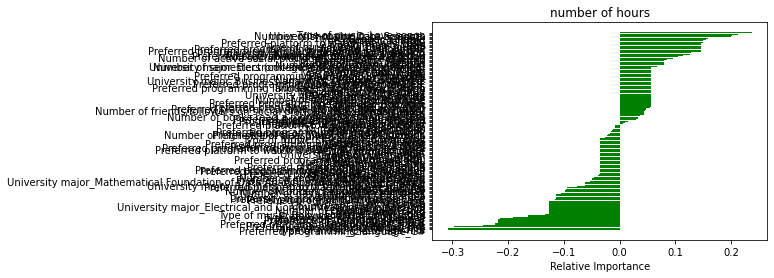

In [ ]:
names=df2.columns[df2.columns != 'Average hours of sleep per night']
plt.title('number of hours')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance') 
plt.show()

In [ ]:
#Shortlisted variables
for i in range(0, len(indices)): 
  if np.abs(importances[i])>=0.1:
        print(names[i])

Age
Weight (lbs)
Number of siblings
GPA 
Average hours spent on phone each day
Number of active social platforms (LinkedIn included)
Number of shopping trips a month
Country of Origin_Malaysia
University major_Biomedical Engineering
University major_Data Science
University major_Data Science 
University major_Electrical and Communications engineering 
University major_Management Science
Gender_Female
Preferred programming language_C
Preferred programming language_C#
Preferred programming language_C++
Preferred programming language_C,java 
Preferred programming language_Java, Python
Preferred programming language_Python, PHP
Preferred programming language_Ruby on rails, python
Vehicle own status_Yes
Preferred platform to watch movies_Hulu
Number of countries visited_2
Number of countries visited_3
Number of countries visited_8
Favorite color_Gold
Favorite color_Purple
Favorite color_Red
Favorite color_Violet
Favorite color_black
Type of music_All kinds of music
Type of music_Bollywood a

In [ ]:
#Writing them into a string
dependent_vars = ['Age',
'Weight (lbs)','Number of siblings'
,'GPA ', 'Average hours spent on phone each day','Number of active social platforms (LinkedIn included)',
'Number of shopping trips a month',
'Country of Origin_Malaysia',
'University major_Biomedical Engineering',
'University major_Data Science',
'University major_Data Science', 
'University major_Electrical and Communications engineering ', 
'University major_Management Science',
'Gender_Female',
'Preferred programming language_C',
'Preferred programming language_C#',
'Preferred programming language_C++',
'Preferred programming language_C,java ', 
'Preferred programming language_Java, Python',
'Preferred programming language_Python, PHP',
'Preferred programming language_Ruby on rails, python',
'Vehicle own status_Yes',
'Preferred platform to watch movies_Hulu',
'Type of music_All kinds of music',
'Type of music_Bollywood and English pop',
'Type of music_Classic',
'Type of music_Hip hop',
'Type of music_Indian folk music ', 
'Type of music_Indie Pop',
'Type of music_Lofi',
'Type of music_Love songs',
'Type of music_Mass',
'Type of music_Old telugu hits',
'Type of music_R & B',
'Type of music_Rap',
'Type of music_Telugu pop',
'Preference of  hot/cold weather_Hot',
'Preference of Cats/dogs_Cats',
'Preference of Cats/dogs_Neither']
dependent_vars

['Age',
 'Weight (lbs)',
 'Number of siblings',
 'GPA ',
 'Average hours spent on phone each day',
 'Number of active social platforms (LinkedIn included)',
 'Number of shopping trips a month',
 'Country of Origin_Malaysia',
 'University major_Biomedical Engineering',
 'University major_Data Science',
 'University major_Data Science',
 'University major_Electrical and Communications engineering ',
 'University major_Management Science',
 'Gender_Female',
 'Preferred programming language_C',
 'Preferred programming language_C#',
 'Preferred programming language_C++',
 'Preferred programming language_C,java ',
 'Preferred programming language_Java, Python',
 'Preferred programming language_Python, PHP',
 'Preferred programming language_Ruby on rails, python',
 'Vehicle own status_Yes',
 'Preferred platform to watch movies_Hulu',
 'Type of music_All kinds of music',
 'Type of music_Bollywood and English pop',
 'Type of music_Classic',
 'Type of music_Hip hop',
 'Type of music_Indian folk 

##OLS Regression

In [ ]:
##dependent and independent variables
y=df2['Average hours of sleep per night']
x=df2[dependent_vars]
X = sm.add_constant(x,has_constant = 'add') #to add constant into OLS regression results

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:

model1 = sm.OLS(y, X)
model1 = model1.fit()
model1.params

const                                                          0.689893
Age                                                           -0.090722
Weight (lbs)                                                  -0.007735
Number of siblings                                            -0.106793
GPA                                                            0.017461
Average hours spent on phone each day                         -0.069724
Number of active social platforms (LinkedIn included)         -0.104655
Number of shopping trips a month                               0.081943
Country of Origin_Malaysia                                    -0.026353
University major_Biomedical Engineering                        0.080026
University major_Data Science                                 -0.046314
University major_Data Science                                 -0.046314
University major_Electrical and Communications engineering    -0.374514
University major_Management Science                            0

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Average hours of sleep per night   R-squared:                       0.603
Model:                                          OLS   Adj. R-squared:                  0.429
Method:                               Least Squares   F-statistic:                     3.472
Date:                              Mon, 18 Apr 2022   Prob (F-statistic):           2.19e-06
Time:                                      23:27:02   Log-Likelihood:                 94.127
No. Observations:                               116   AIC:                            -116.3
Df Residuals:                                    80   BIC:                            -17.12
Df Model:                                        35                                         
Covariance Type:                          nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                           0.6899      0.092      7.504      0.000       0.507       0.873
Age                                                            -0.0907      0.096     -0.941      0.350      -0.283       0.101
Weight (lbs)                                                   -0.0077      0.093     -0.084      0.934      -0.192       0.176
Number of siblings                                             -0.1068      0.115     -0.932      0.354      -0.335       0.121
GPA                                                             0.0175      0.080      0.219      0.827      -0.141       0.176
Average hours spent on phone each day                          -0.0697      0.086     -0.811      0.420      -0.241       0.101
Number of active social platforms (LinkedIn included)          -0.1047      0.101     -1.035      0.304      -0.306       0.097
Number of shopping trips a month                                0.0819      0.081      1.010      0.316      -0.080       0.243
Country of Origin_Malaysia                                     -0.0264      0.098     -0.269      0.789      -0.221       0.169
University major_Biomedical Engineering                         0.0800      0.071      1.133      0.261      -0.061       0.221
University major_Data Science                                  -0.0463      0.018     -2.568      0.012      -0.082      -0.010
University major_Data Science                                  -0.0463      0.018     -2.568      0.012      -0.082      -0.010
University major_Electrical and Communications engineering     -0.3745      0.143     -2.621      0.010      -0.659      -0.090
University major_Management Science                             0.0094      0.102      0.092      0.927      -0.194       0.213
Gender_Female                                                   0.0198      0.043      0.457      0.649      -0.066       0.106
Preferred programming language_C                               -0.0674      0.121     -0.557      0.579      -0.308       0.173
Preferred programming language_C#                              -0.2316      0.070     -3.309      0.001      -0.371      -0.092
Preferred programming language_C++                             -0.0374      0.164     -0.228      0.820      -0.364       0.289
Preferred programming language_C,java                          -0.1923      0.198     -0.972      0.334      -0.586       0.201
Preferred programming language_Java, Python                     0.0308      0.076      0.407      0.685      -0.1

###Model 2 with only Numerical variables as Independent variables

In [ ]:
p = df2[num_features].drop('Average hours of sleep per night',axis = 1)
p1=df2['Average hours of sleep per night']

In [ ]:
p

,Age,Height (inches),Weight (lbs),Number of siblings,GPA,Programming experience (in months),Number of semesters (college and masters combined),Number of courses taking this semester,Number of hours of study per week,Average hours spent on phone each day,Number of active social platforms (LinkedIn included),Number of friends/followers on social platform (LinkedIn included),Number of high school classmates still kept in touch,Number of close friends,Number of books read a month (non school related),Stipend received per month,Number of days of exercise per week,Number of movies watched per week,Number of shopping trips a month
0,0.076923,0.308108,0.205298,0.25,1.000000,0.000000,0.545455,0.500000,0.500,0.285714,0.222222,0.007143,0.001252,0.066667,0.4,0.533333,0.0,0.083333,0.2
1,0.538462,0.189189,0.293377,0.50,1.000000,0.416667,0.545455,0.500000,0.500,0.071429,0.333333,0.009524,0.002503,0.100000,0.2,0.533333,0.3,0.083333,0.3
2,0.076923,0.405405,0.570728,0.25,0.641176,0.200000,0.454545,0.333333,0.200,0.285714,0.444444,0.007952,0.017522,0.200000,0.0,0.000000,0.0,0.083333,0.0
3,0.230769,0.270270,0.172185,0.25,0.752941,0.200000,0.636364,0.333333,0.125,0.142857,0.333333,0.014286,0.005006,0.200000,0.0,0.000000,0.0,0.000000,0.2
4,0.153846,0.243243,0.450331,0.25,0.529412,0.025000,0.727273,0.333333,0.625,0.357143,0.444444,0.142857,0.036295,0.233333,0.0,0.000000,0.2,0.416667,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.076923,0.405405,0.570795,0.25,0.641176,0.200000,0.727273,0.333333,0.125,0.285714,0.333333,0.007619,0.011264,0.333333,0.0,0.000000,0.0,0.083333,0.1
112,0.076923,0.297297,0.139073,0.00,0.411765,0.041667,0.727273,0.333333,0.350,0.214286,0.444444,0.026571,0.023780,0.200000,0.2,0.000000,0.0,0.250000,0.1
113,0.153846,0.162162,0.304636,0.00,1.000000,0.100000,0.636364,0.000000,0.175,0.071429,0.333333,0.009524,0.005006,0.266667,0.2,0.266667,0.3,0.083333,0.2
114,0.230769,0.324324,0.496689,0.25,0.588235,0.000000,0.727273,0.333333,0.200,0.071429,0.444444,0.014286,0.011264,0.333333,0.0,0.000000,0.2,0.083333,0.0


In [ ]:
model2 = sm.OLS(p1, p)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Average hours of sleep per night   R-squared (uncentered):                   0.918
Model:                                          OLS   Adj. R-squared (uncentered):              0.901
Method:                               Least Squares   F-statistic:                              56.81
Date:                              Tue, 19 Apr 2022   Prob (F-statistic):                    5.24e-44
Time:                                      01:28:31   Log-Likelihood:                          41.372
No. Observations:                               116   AIC:                                     -44.74
Df Residuals:                                    97   BIC:                                      7.573
Df Model:                                        19                                                  
Covariance Type:                          nonrobust                                                  
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Age                                                                   -0.0556      0.144     -0.387      0.700      -0.341       0.229
Height (inches)                                                        0.1230      0.180      0.683      0.496      -0.234       0.480
Weight (lbs)                                                           0.0022      0.115      0.019      0.985      -0.226       0.231
Number of siblings                                                    -0.0988      0.123     -0.802      0.425      -0.343       0.146
GPA                                                                    0.2354      0.087      2.700      0.008       0.062       0.408
Programming experience (in months)                                     0.0494      0.117      0.422      0.674      -0.183       0.282
Number of semesters (college and masters combined)                     0.2556      0.097      2.645      0.010       0.064       0.447
Number of courses taking this semester                                 0.2618      0.177      1.483      0.141      -0.089       0.612
Number of hours of study per week                                      0.0772      0.107      0.722      0.472      -0.135       0.289
Average hours spent on phone each day                                  0.1043      0.103      1.008      0.316      -0.101       0.310
Number of active social platforms (LinkedIn included)                  0.3401      0.127      2.680      0.009       0.088       0.592
Number of friends/followers on social platform (LinkedIn included)    -0.0638      0.211     -0.302      0.763      -0.483       0.355
Number of high school classmates still kept in touch                  -0.3579      0.249     -1.437      0.154      -0.852       0.136
Number of close friends                                               -0.0060      0.152     -0.040      0.968      -0.308       0.296
Number of books read a month (non school related)                     -0.0206      0.096     -0.215      0.830      -0.210       0.169
Stipend received per month                                            -0.0405      0.078     -0.522      0.603      -0.194       0.113
Number of days of exercise per week                                   -0.0098      0.116     -0.084      0.933      -0.240       0.221
Number of movies watched per week                                     -0.0938      0.110     -0.854      0.395      -0.312       0